In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [113]:
df=pd.read_csv('finaldata.csv')

In [114]:
df.head()

,AdminName,GeoRegion,GeoSubreg,IncomeGrp,LendCat,VarDesc,UrbanPop,RuralPop,TotalPop,UrbanLA,RuralLA,TotalLA
0,Syrian Arab Republic,Asia,Western Asia,Low income,IDA,Elevation under 5 meters,30620.145664,1.084850e+04,4.146865e+04,15.427241,22.357709,37.784950
1,Togo,Africa,Western Africa,Low income,IDA,Elevation under 5 meters,55219.074696,1.553526e+05,2.105717e+05,27.818326,205.311436,233.129761
2,Mozambique,Africa,Eastern Africa,Low income,IDA,Elevation between 50 and 100 meters,279377.806046,2.166789e+06,2.446166e+06,386.302173,93757.456316,94143.758488
3,Burkina Faso,Africa,Western Africa,Low income,IDA,Elevation between 400 and 800 meters,637.095442,8.170922e+03,8.808017e+03,134.234603,9032.678212,9166.912815
4,South Sudan,Africa,Eastern Africa,Low income,IDA,Elevation between 800 and 1500 meters,277.162453,7.758986e+04,7.786702e+04,65.242679,33046.173375,33111.416054


In [115]:
df1=df[['GeoSubreg','IncomeGrp','VarDesc','UrbanPop','RuralPop','RuralLA','UrbanLA','TotalLA','TotalPop']]

In [116]:
df1=df1[df1['UrbanPop']<=1.000000e+06]

In [117]:
df1=df1[df1['UrbanPop']>=1.000000e+04]

In [118]:
df1=df1[df1['VarDesc'].isin(['Elevation under 5 meters',
       'Elevation between 800 and 1500 meters',
       'Elevation between 200 and 400 meters',
       'Elevation between 1500 and 3000 meters',
       'Elevation between 50 and 100 meters',
       'Elevation between 25 and 50 meters',
       'Elevation between 400 and 800 meters',
       'Elevation between 5 and 10 meters',
       'Elevation between 10 and 25 meters',
       'Elevation between 100 and 200 meters',
       'Elevation between 3000 and 5000 meters',
       'Elevation over 5000 meters'])]

In [119]:
df1['VarDesc'].unique()

array(['Elevation under 5 meters', 'Elevation between 50 and 100 meters',
       'Elevation between 800 and 1500 meters',
       'Elevation between 25 and 50 meters',
       'Elevation between 10 and 25 meters',
       'Elevation between 200 and 400 meters',
       'Elevation between 100 and 200 meters',
       'Elevation between 5 and 10 meters',
       'Elevation between 1500 and 3000 meters',
       'Elevation between 400 and 800 meters',
       'Elevation between 3000 and 5000 meters'], dtype=object)

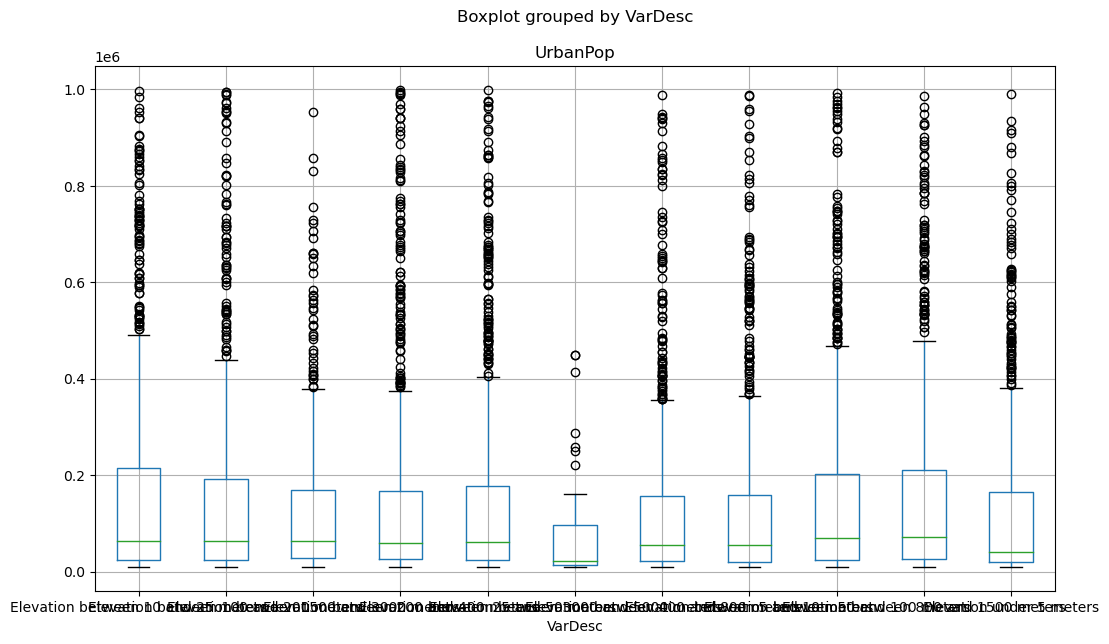

In [120]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df1.boxplot('UrbanPop','VarDesc',ax=ax)
plt.show()

In [121]:
df1.shape

(7503, 9)

In [122]:
df1['IncomeGrp'].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [123]:
df1['VarDesc'].unique()

array(['Elevation under 5 meters', 'Elevation between 50 and 100 meters',
       'Elevation between 800 and 1500 meters',
       'Elevation between 25 and 50 meters',
       'Elevation between 10 and 25 meters',
       'Elevation between 200 and 400 meters',
       'Elevation between 100 and 200 meters',
       'Elevation between 5 and 10 meters',
       'Elevation between 1500 and 3000 meters',
       'Elevation between 400 and 800 meters',
       'Elevation between 3000 and 5000 meters'], dtype=object)

In [124]:
df1['GeoSubreg'].unique()

array(['Western Asia', 'Western Africa', 'Eastern Africa', 'Central Asia',
       'Eastern Asia', 'Caribbean', 'Middle Africa', 'Southern Asia',
       'Eastern Europe', 'Central America', 'Northern Africa',
       'South-eastern Asia', 'South America', 'Melanesia',
       'Southern Africa', 'Micronesia', 'Southern Europe',
       'Western Europe', 'Northern Europe', 'Australia and New Zealand',
       'Northern America'], dtype=object)

In [125]:
df1.describe()

,UrbanPop,RuralPop,RuralLA,UrbanLA,TotalLA,TotalPop
count,7503.000000,7.503000e+03,7.503000e+03,7503.000000,7.503000e+03,7.503000e+03
mean,147372.844601,5.836124e+05,1.042634e+05,1155.159574,1.054186e+05,7.309852e+05
std,198413.008297,1.326167e+06,3.154953e+05,2443.965683,3.162761e+05,1.401545e+06
min,10004.280354,0.000000e+00,0.000000e+00,1.366241,2.430921e+00,1.044853e+04
25%,23660.265250,4.229972e+04,3.435552e+03,157.768828,3.911662e+03,9.019719e+04
50%,59784.421410,1.513659e+05,1.548687e+04,438.449044,1.636540e+04,2.672964e+05
75%,181028.190359,5.148382e+05,6.877153e+04,1039.517800,6.993049e+04,7.826336e+05
max,999330.547036,2.839959e+07,3.890167e+06,39274.314282,3.913663e+06,2.889486e+07


In [126]:
le_Geo=LabelEncoder()
df1['GeoSubreg']=le_Geo.fit_transform(df1['GeoSubreg'])

le_Var=LabelEncoder()
df1['VarDesc']=le_Var.fit_transform(df1['VarDesc'])



In [127]:
df1['GeoSubreg'].unique()

array([19, 18,  4,  3,  5,  1,  9, 16,  6,  2, 10, 14, 13,  7, 15,  8, 17,
       20, 12,  0, 11])

In [128]:
df1['VarDesc'].unique()

array([10,  8,  9,  4,  0,  3,  1,  7,  2,  6,  5])

In [129]:
df1['IncomeGrp'].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [130]:
df2 = df1.copy()

In [132]:
from sklearn.model_selection import train_test_split


X1 = df2.drop("IncomeGrp", axis=1)
y1 = df2["IncomeGrp"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X1_train, y1_train)
y_pred = random_forest_classifier.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9733510992671552


In [133]:
le_Inc=LabelEncoder()
df1['IncomeGrp']=le_Inc.fit_transform(df1['IncomeGrp'])

In [134]:

X2=df1.drop("TotalPop",axis=1)
y2=df1['TotalPop']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
linear_reg=LinearRegression()
linear_reg.fit(X2_train,y2_train)
#linear_reg.score(y,y_test)

LinearRegression()

In [135]:
X2_test.head()

,GeoSubreg,IncomeGrp,VarDesc,UrbanPop,RuralPop,RuralLA,UrbanLA,TotalLA
5816,14,2,10,16300.139040,158806.067817,29207.037199,339.216363,29546.253562
8307,6,2,3,117191.155817,246829.538267,140628.515295,4839.897215,145468.412510
8260,9,2,1,90652.980449,237979.659391,30693.940928,422.747165,31116.688093
11544,19,3,1,14547.361273,2554.042097,199.442308,217.115639,416.557947
19075,6,0,6,10942.893061,104335.798554,16581.980544,393.066307,16975.046851


In [136]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X2_train,y2_train)
model.score(X2_test,y2_test)

0.9953673208671937

In [137]:
X2_train.head()

,GeoSubreg,IncomeGrp,VarDesc,UrbanPop,RuralPop,RuralLA,UrbanLA,TotalLA
12525,13,3,4,40785.705124,3.390434e+04,5637.399767,339.810911,5977.210678
11664,13,3,6,53969.906357,2.372778e+05,133868.982673,1502.635680,135371.618353
9128,14,2,0,64877.344422,2.324524e+05,25656.389977,1047.890771,26704.280748
7353,14,2,6,90820.561867,1.797255e+06,73309.166084,1074.900999,74384.067083
6262,14,2,1,540723.077532,1.833852e+06,34369.544149,400.245844,34769.789993


In [138]:
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(X2,y2.values)

RandomForestRegressor(random_state=0)

In [139]:
y_predict=random_forest_reg.predict(X2)

In [140]:
error=np.sqrt(mean_squared_error(y2,y_predict))

In [141]:
error

30596.069729105817

In [142]:
# accuracy = accuracy_score(y_test, y_predict)

In [143]:

#Input 
#df1=df[['GeoSubreg','IncomeGrp','VarDesc','UrbanPop','RuralPop','RuralLA','UrbanLA','TotalLA']]
tes=np.array([["Western Africa","Low income","Elevation between 400 and 800 meters",55219.074696,1.553526e+05,205.311436,27.818326,233.129761]])
tes[:,0]=le_Geo.transform(tes[:,0])
tes[:,1]=le_Inc.transform(tes[:,1])
tes[:,2]=le_Var.transform(tes[:,2])
tes=tes.astype(float)
tes

array([[1.80000000e+01, 1.00000000e+00, 6.00000000e+00, 5.52190747e+04,
        1.55352600e+05, 2.05311436e+02, 2.78183260e+01, 2.33129761e+02]])

In [144]:
tes_pred=linear_reg.predict(tes)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [145]:
tes_pred

array([210571.67469613])

In [146]:
import pickle

In [147]:
data={"model":linear_reg,"classifier":random_forest_classifier, "le_Geo":le_Geo, "le_Inc":le_Inc,"le_Var":le_Var}
with open('saved_steps.pkl',"wb") as file:
    pickle.dump(data,file)

In [148]:
with open('saved_steps.pkl','rb') as file:
    pickle.load(file)
regressor_loaded=data['model']
le_Geo=data['le_Geo']
le_Inc=data['le_Inc']
le_Var=data['le_Var']

In [149]:
tes_pred2=regressor_loaded.predict(tes)
tes_pred2

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([210571.67469613])

In [151]:
X1_test.head()

,GeoSubreg,VarDesc,UrbanPop,RuralPop,RuralLA,UrbanLA,TotalLA,TotalPop
5816,14,10,16300.139040,158806.067817,29207.037199,339.216363,29546.253562,175106.206857
8307,6,3,117191.155817,246829.538267,140628.515295,4839.897215,145468.412510,364020.694085
8260,9,1,90652.980449,237979.659391,30693.940928,422.747165,31116.688093,328632.639839
11544,19,1,14547.361273,2554.042097,199.442308,217.115639,416.557947,17101.403369
19075,6,6,10942.893061,104335.798554,16581.980544,393.066307,16975.046851,115278.691615
